**Lấy YoloV5 của Ultralytics từ Github**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 16098, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 16098 (delta 1), reused 5 (delta 0), pack-reused 16089
Receiving objects: 100% (16098/16098), 14.77 MiB | 19.59 MiB/s, done.
Resolving deltas: 100% (11025/11025), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
!pip install -qr requirements.txt  # Tải thư viện cần thiết từ file requirements.txt của YoloV5
import torch

from IPython.display import Image, clear_output  # Để có thể Display hình ảnh
from utils.downloads import attempt_download  # Để donwload model/datasets

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
Setup complete. Using torch 2.1.0+cu121 CPU


**Lấy dataset từ Roboflow**

In [ ]:
!pip install -q roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="jK3H8hSpOmL1suamTHwm")
project = rf.workspace("f1ndlov3r").project("bienso-ar1op")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.


Extracting Dataset Version Zip to BienSo-1 in yolov5pytorch:: 100%|██████████| 5956/5956 [00:00<00:00, 6619.32it/s]


**File thông tin tập dữ liệu**

In [ ]:
%cat /content/yolov5/BienSo-1/data.yaml

names:
- Liscense-Plates
nc: 1
roboflow:
  license: CC BY 4.0
  project: bienso-ar1op
  url: https://universe.roboflow.com/f1ndlov3r/bienso-ar1op/dataset/1
  version: 1
  workspace: f1ndlov3r
test: ../test/images
train: BienSo-1/train/images
val: BienSo-1/valid/images


In [ ]:
# Lấy số class từ file yaml trên
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes_BienSo = str(yaml.safe_load(stream)['nc'])

In [ ]:
# Đây là thông tin file cấu hình ta sử dụng (ở đây là yolov5s)
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
# Sử dụng iPython để viết lại biến trong file cấu hình trên
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
# Thay lại biến class đã lấy từ file yaml lúc nãy
# Lưu file cấy hình mới bằng đường dẫn bến dưới
%%writetemplate /content/yolov5/models/BienSo.yaml

# parameters
nc: {num_classes_BienSo}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
# Huấn luyện data bằng yolov5s với file cấu hình vừa tạo
%%time
!python train.py --img 640 --batch 32 --epochs 100 --data /content/yolov5/BienSo-1/data.yaml --cfg /content/yolov5/models/BienSo.yaml --weights '' --name BienSo_results  --cache

2023-12-15 14:41:44.859761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 14:41:44.859836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 14:41:44.861213: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 14:41:45.914924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=/content/yolov5/models/BienSo.yaml, data=/content/yolov5/BienSo-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=Fal

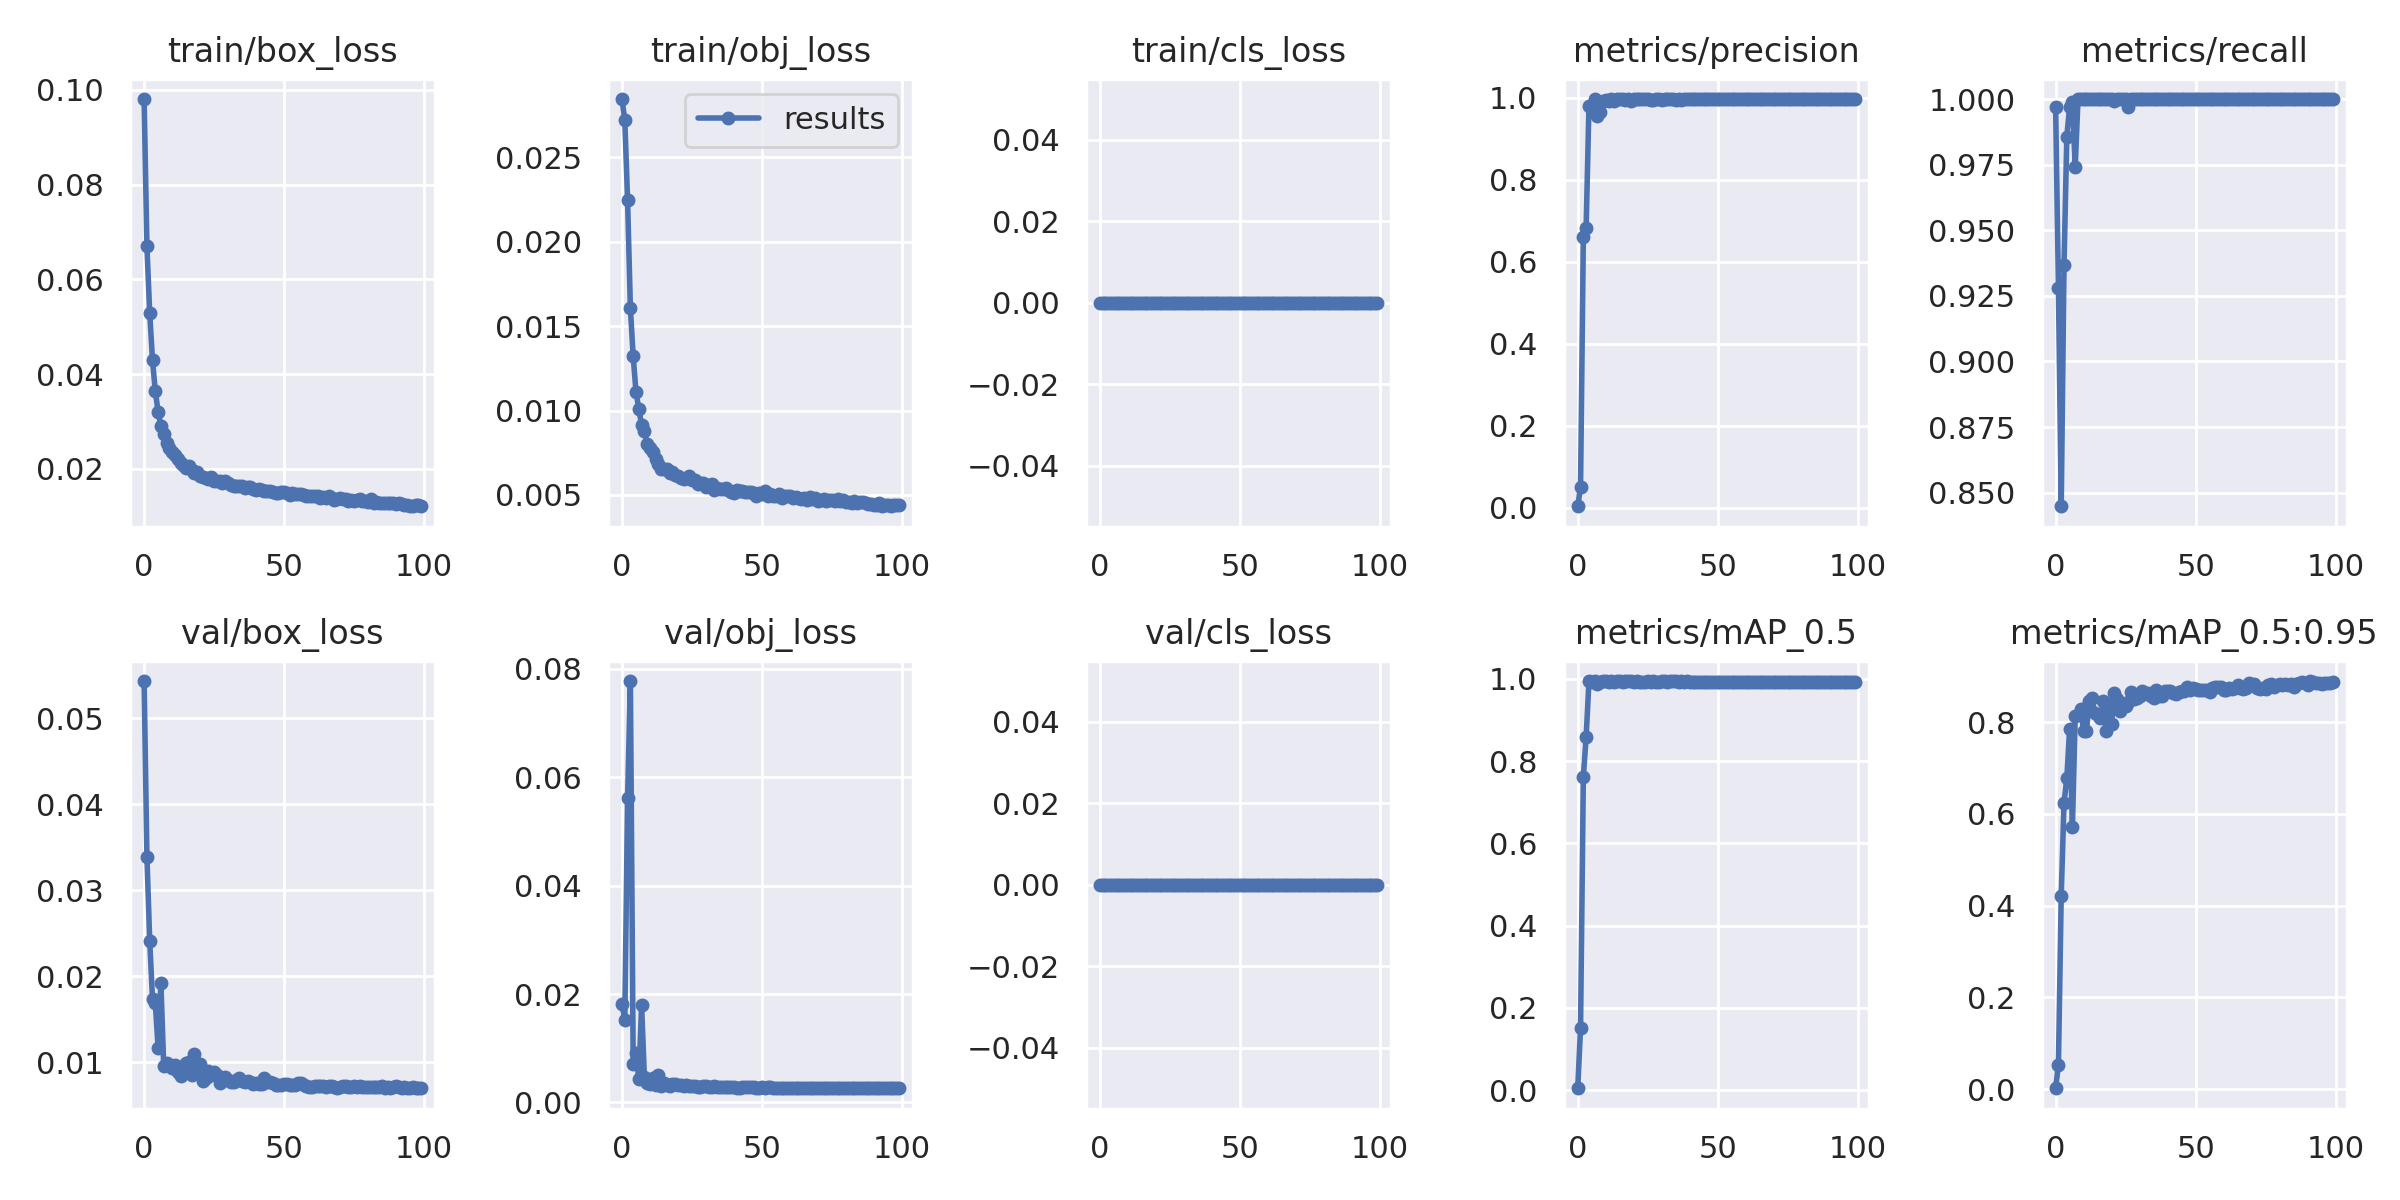

In [ ]:
from utils.plots import plot_results
Image(filename='/content/yolov5/runs/train/BienSo_results/results.png', width=1000)

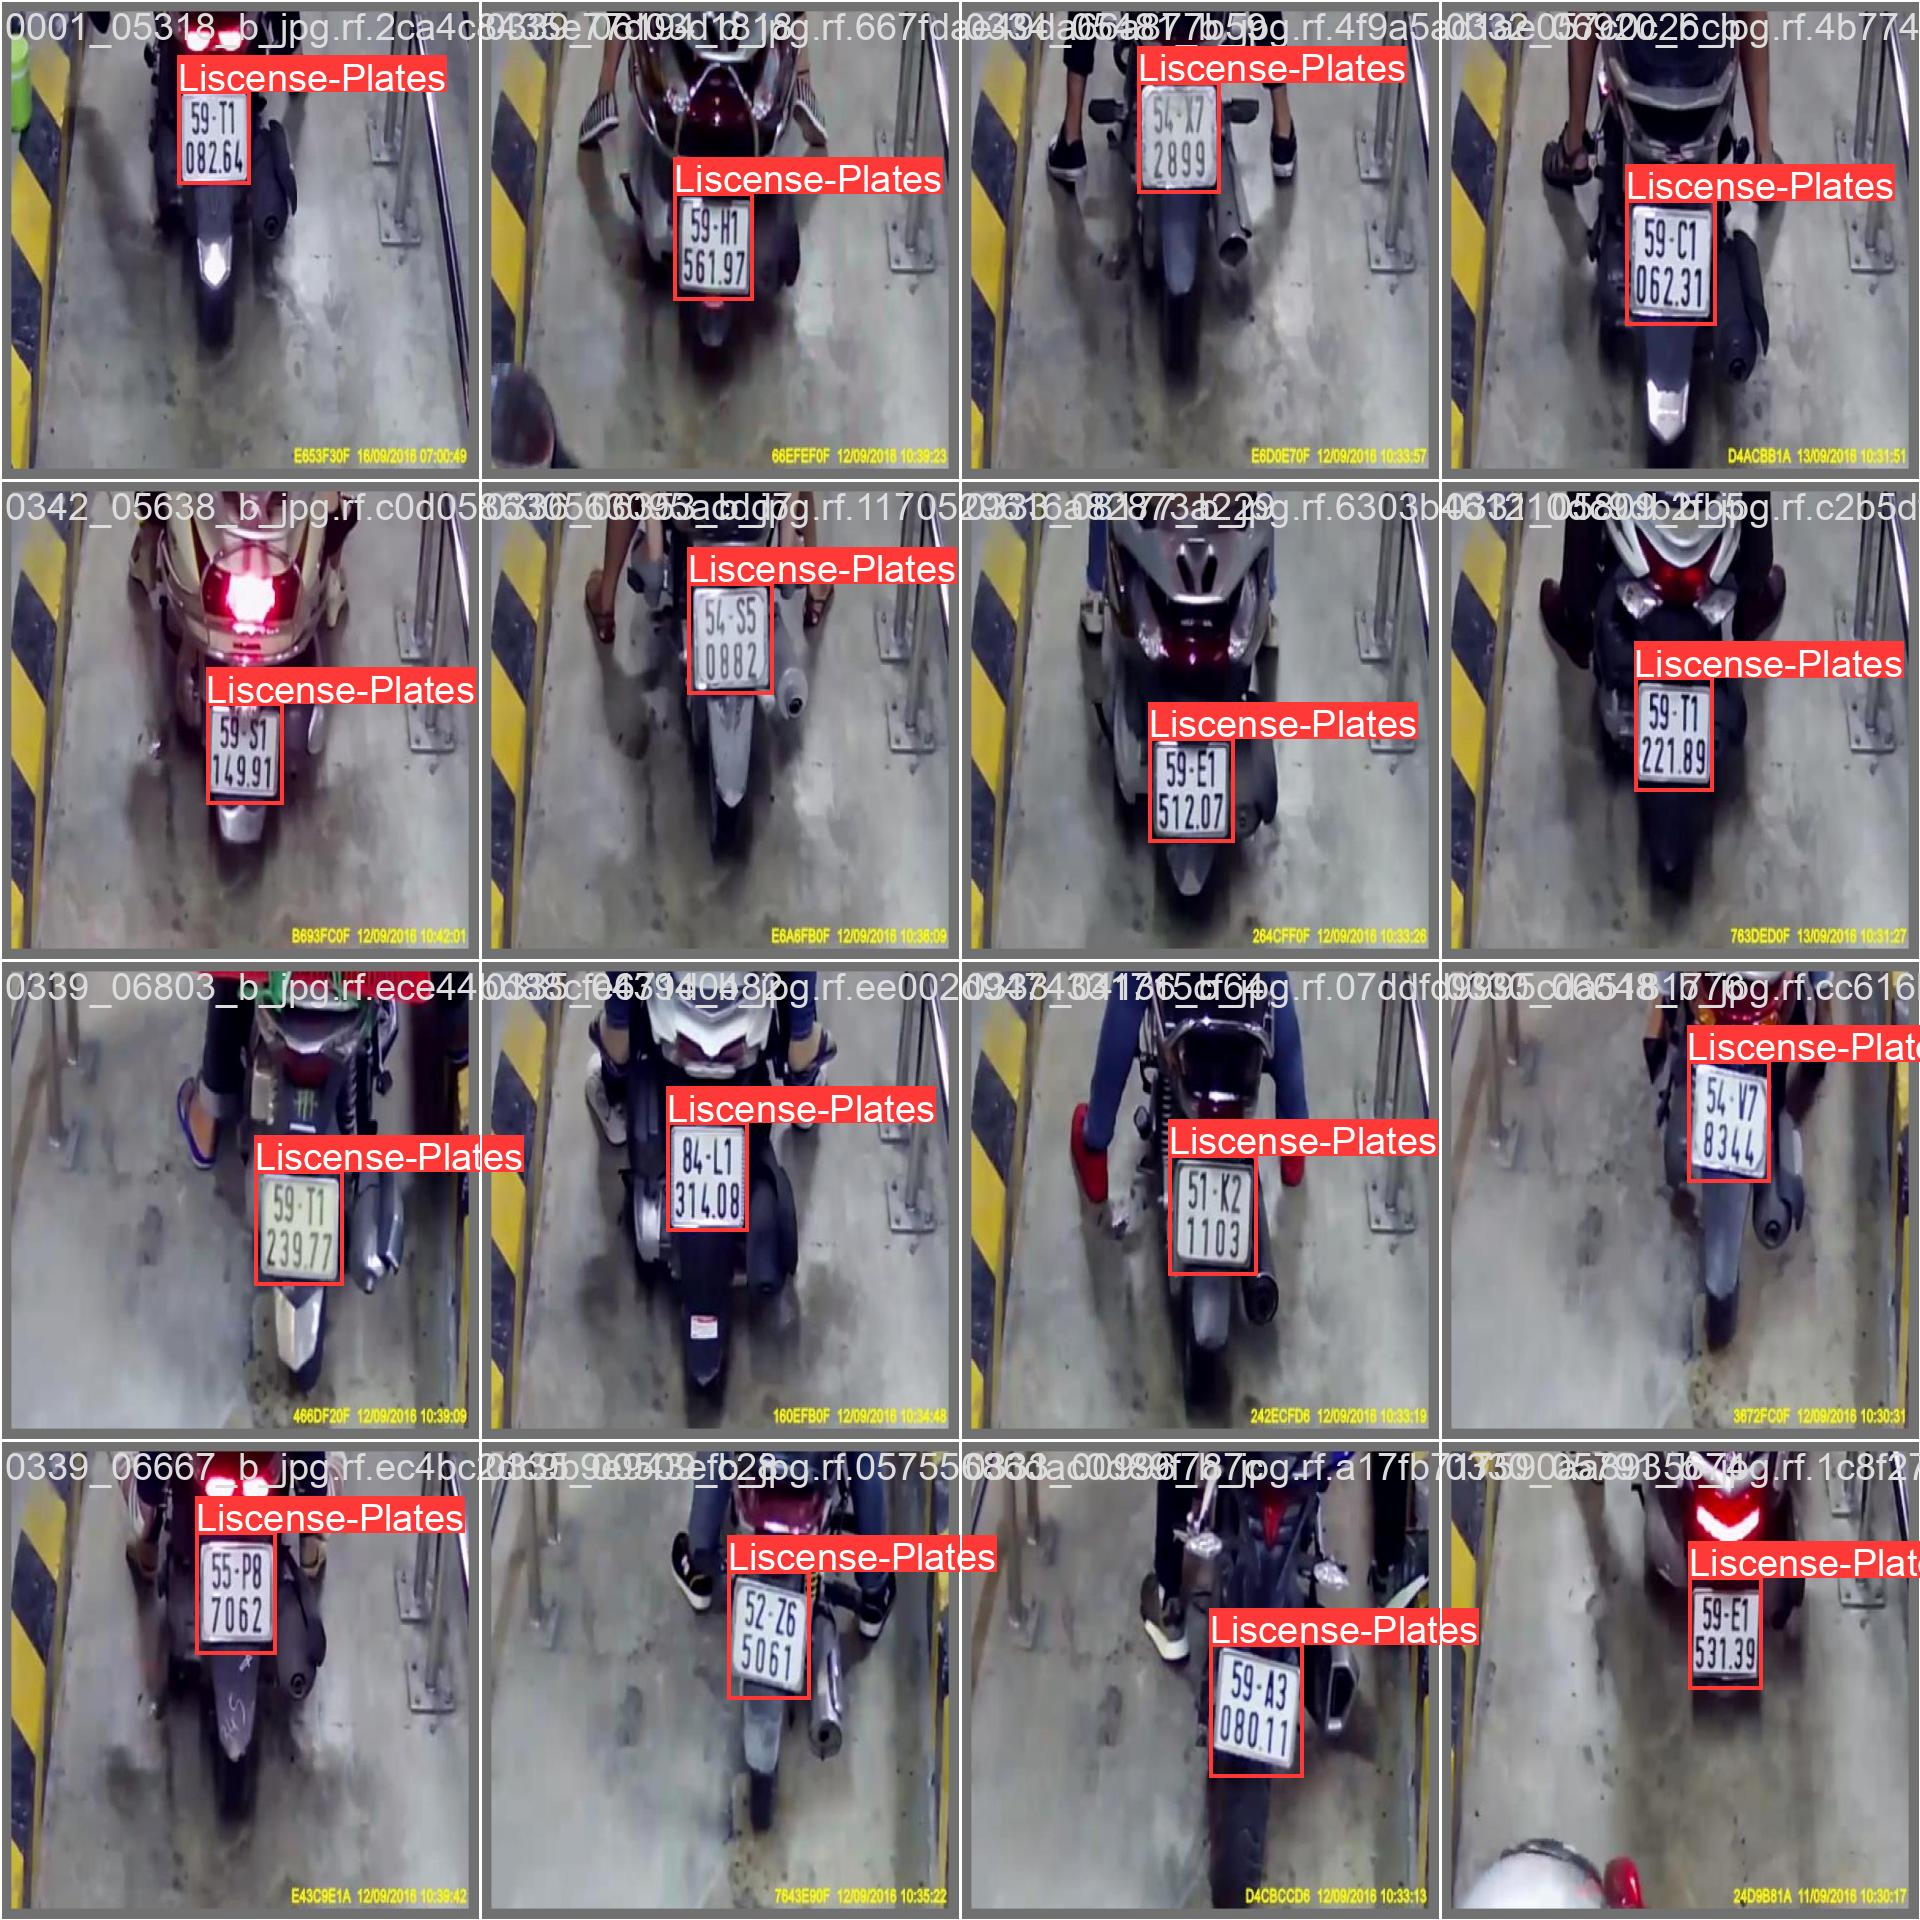

In [ ]:
Image(filename='/content/yolov5/runs/train/BienSo_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


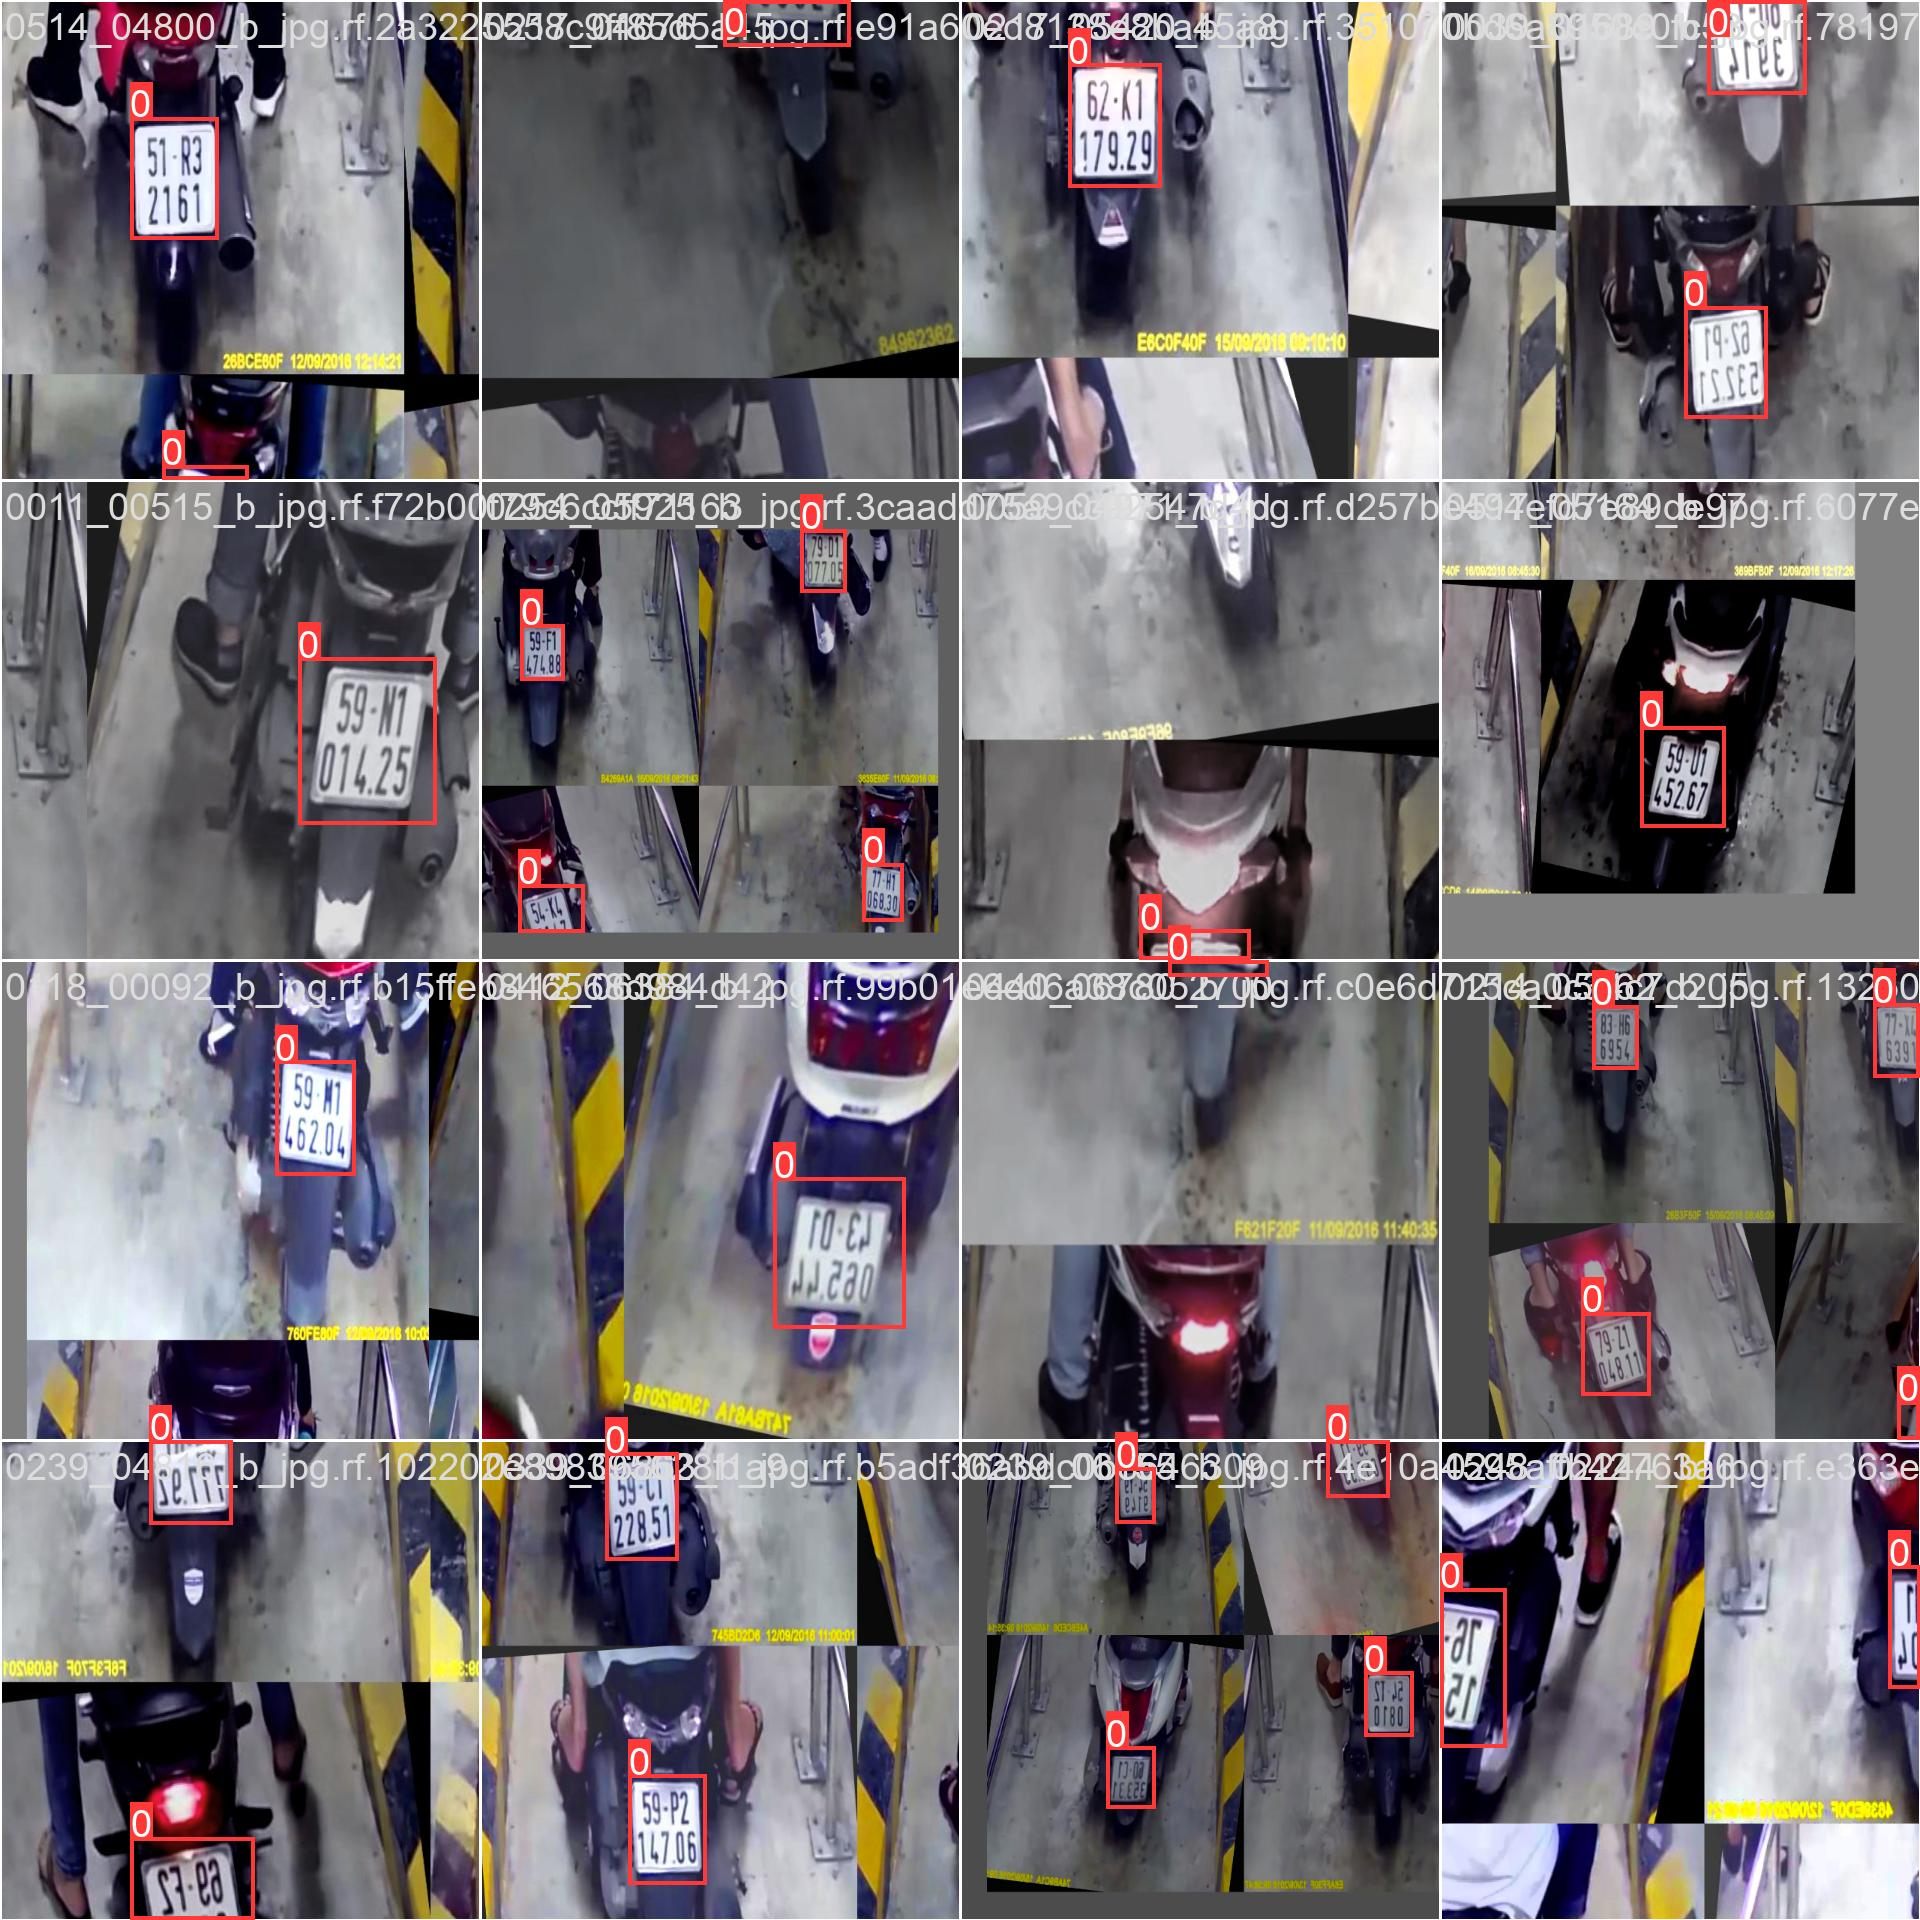

In [ ]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/BienSo_results/train_batch0.jpg', width=900)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Detect file test với weights là best.pt**

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Machine_Learning/best.pt --img 640 --conf 0.4 --source /content/yolov5/BienSo-1/test/images

detect: weights=['/content/drive/MyDrive/Machine_Learning/best.pt'], source=/content/yolov5/BienSo-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
BienSo summary: 182 layers, 7246518 parameters, 0 gradients
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/175 /content/yolov5/BienSo-1/test/images/0004_06801_b_jpg.rf.6fe4e4fb82bdfc03bd3e5f56cfc191b3.jpg: 640x640 1 Liscense-Plates, 12.5ms
image 2/175 /content/yolov5/BienSo-1/test/images/0007_05159_b_jpg.rf.646c14dc261bb20cd1ae707ca015c97c.jpg: 640x640 1 Liscense-Plates, 12.6ms
im

**Display ảnh đã detect từ file train**

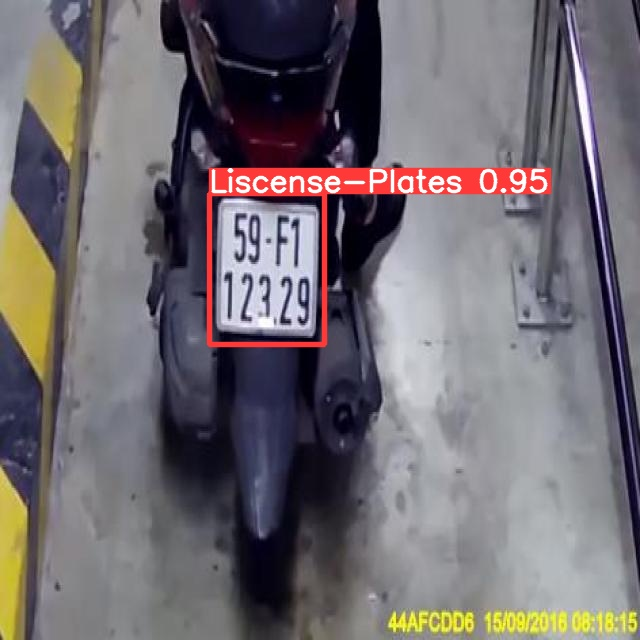

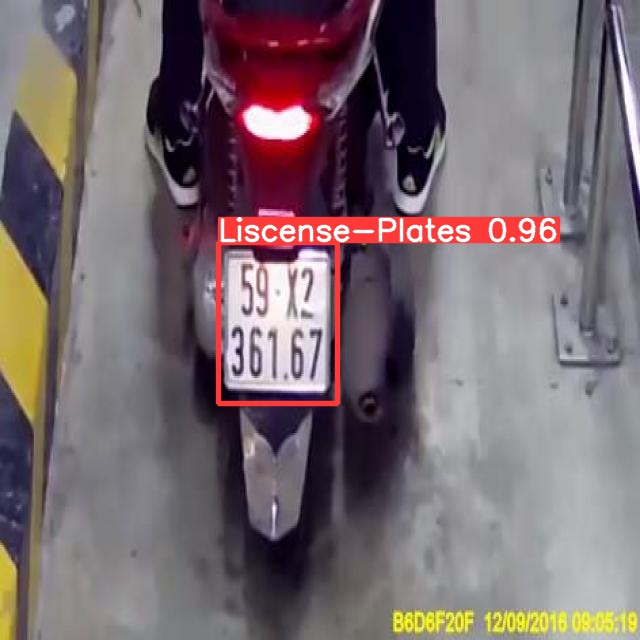

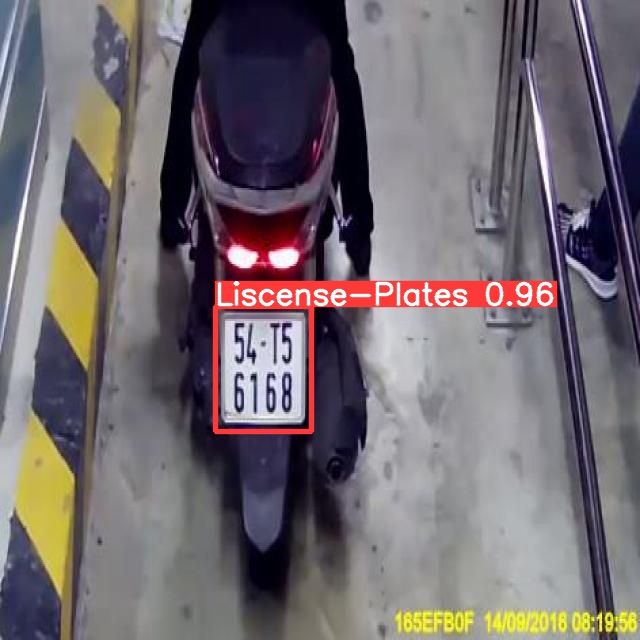

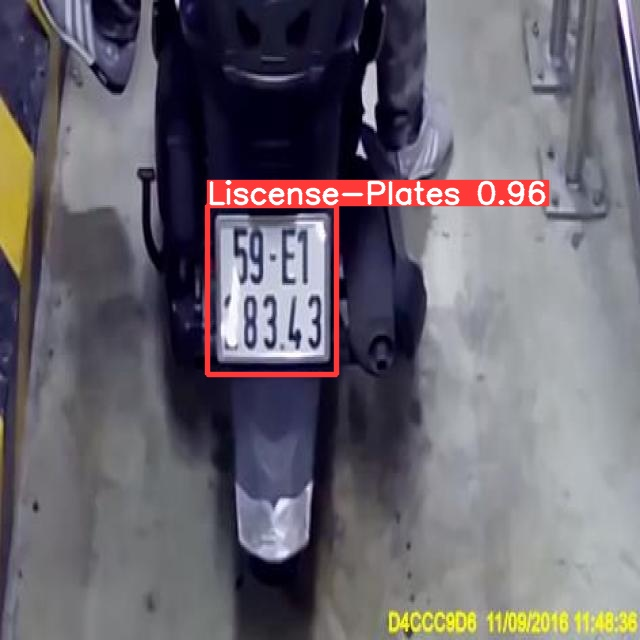

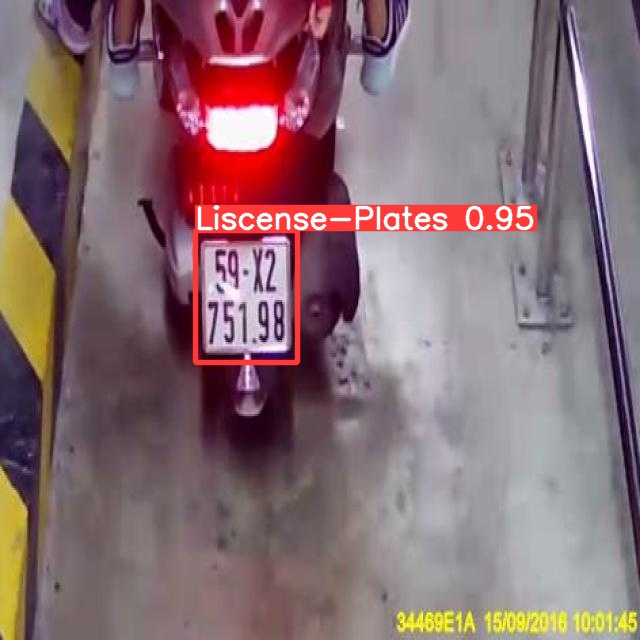

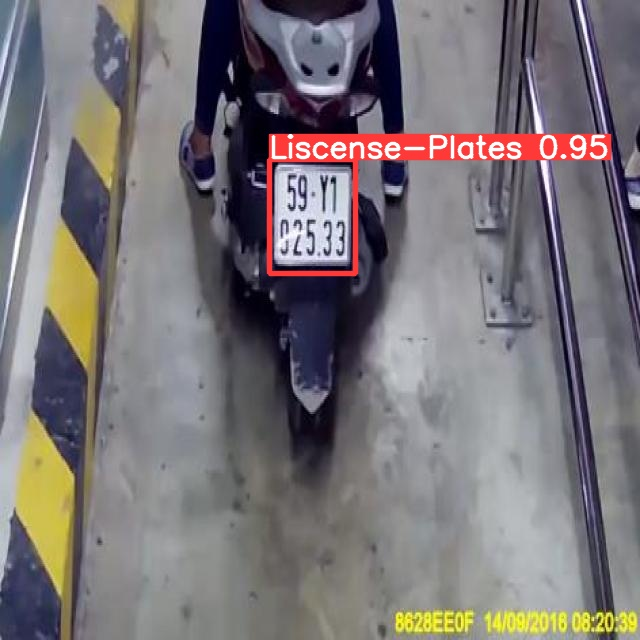

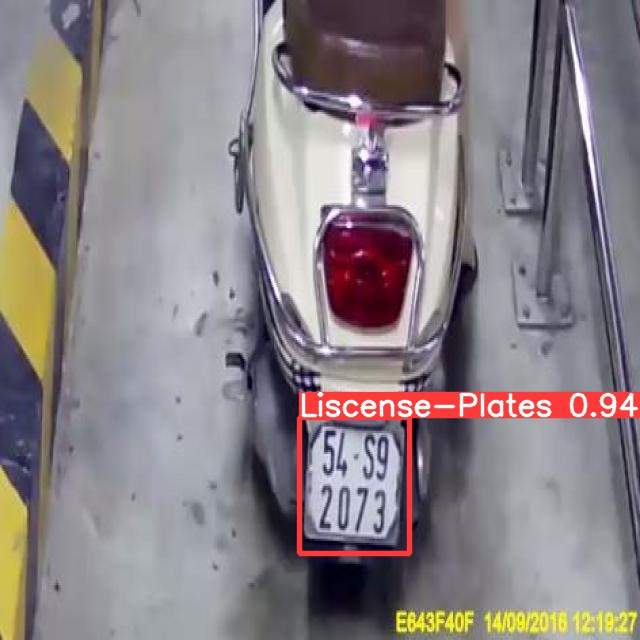

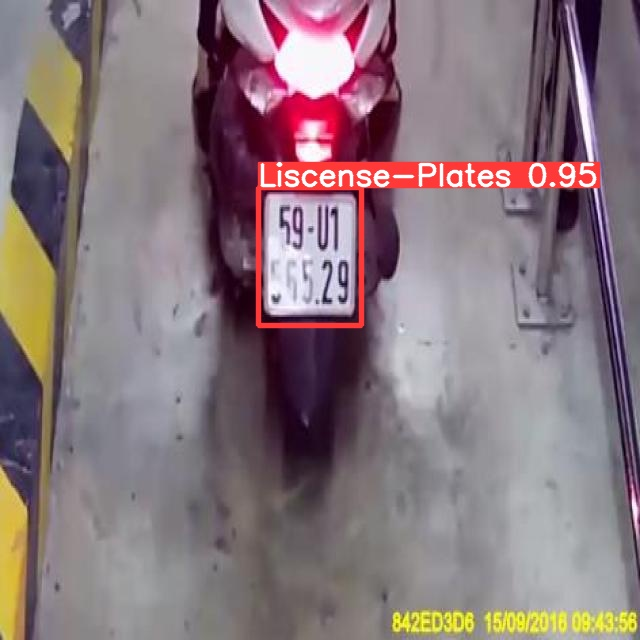

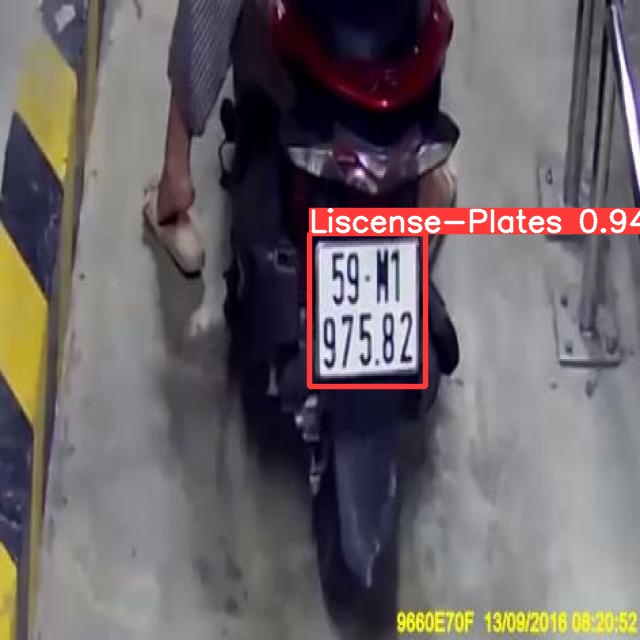

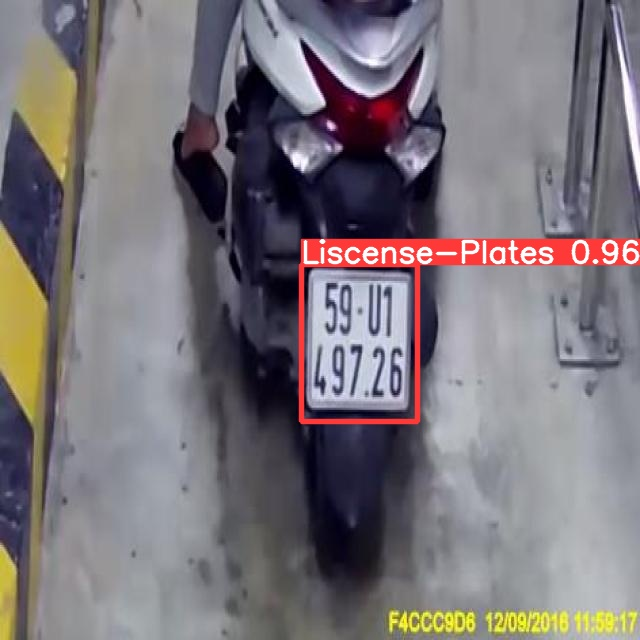

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

**Thử với ảnh down trên mạng về**

In [ ]:
!python detect.py --save-crop --weights /content/drive/MyDrive/Machine_Learning/best.pt --conf 0.4 --img 640 --source /content/drive/MyDrive/CSGT_bat_nhom_thanh_nien_quay_ro-1645614351462.jpg

detect: weights=['/content/drive/MyDrive/Machine_Learning/best.pt'], source=/content/drive/MyDrive/CSGT_bat_nhom_thanh_nien_quay_ro-1645614351462.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
BienSo summary: 182 layers, 7246518 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CSGT_bat_nhom_thanh_nien_quay_ro-1645614351462.jpg: 480x640 3 Liscense-Platess, 49.6ms
Speed: 0.7ms pre-process, 49.6ms inference, 435.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


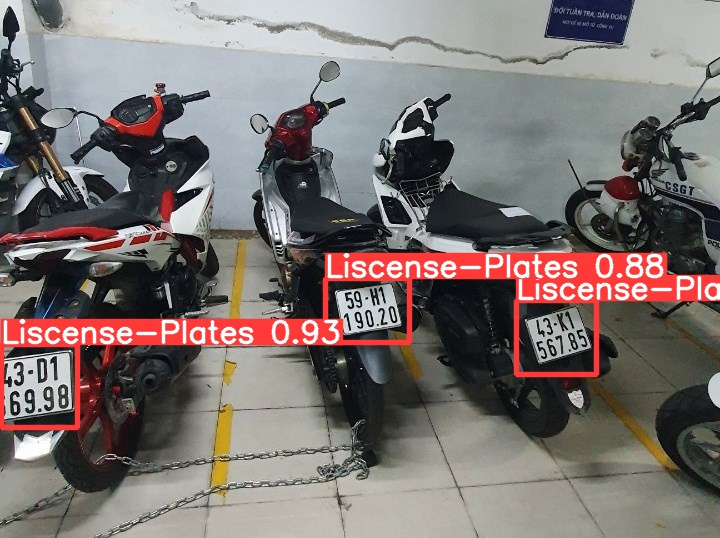

In [ ]:
display(Image('/content/yolov5/runs/detect/exp3/CSGT_bat_nhom_thanh_nien_quay_ro-1645614351462.jpg'))

**Biển số đã được detect**

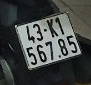

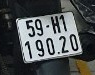

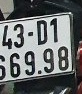

In [ ]:
display(Image('/content/yolov5/runs/detect/exp3/crops/Liscense-Plates/CSGT_bat_nhom_thanh_nien_quay_ro-1645614351462.jpg'))
display(Image('/content/yolov5/runs/detect/exp3/crops/Liscense-Plates/CSGT_bat_nhom_thanh_nien_quay_ro-16456143514622.jpg'))
display(Image('/content/yolov5/runs/detect/exp3/crops/Liscense-Plates/CSGT_bat_nhom_thanh_nien_quay_ro-16456143514623.jpg'))

**Ảnh tự chụp**

In [ ]:
!python detect.py --save-crop --weights /content/drive/MyDrive/Machine_Learning/best.pt --img 640 --conf 0.4 --source /content/drive/MyDrive/z4978030839008_0fe8b56f7b784c694ee43088b18be99d.jpg

detect: weights=['/content/drive/MyDrive/Machine_Learning/best.pt'], source=/content/drive/MyDrive/z4978030839008_0fe8b56f7b784c694ee43088b18be99d.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
BienSo summary: 182 layers, 7246518 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/z4978030839008_0fe8b56f7b784c694ee43088b18be99d.jpg: 640x480 1 Liscense-Plates, 55.8ms
Speed: 0.8ms pre-process, 55.8ms inference, 459.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


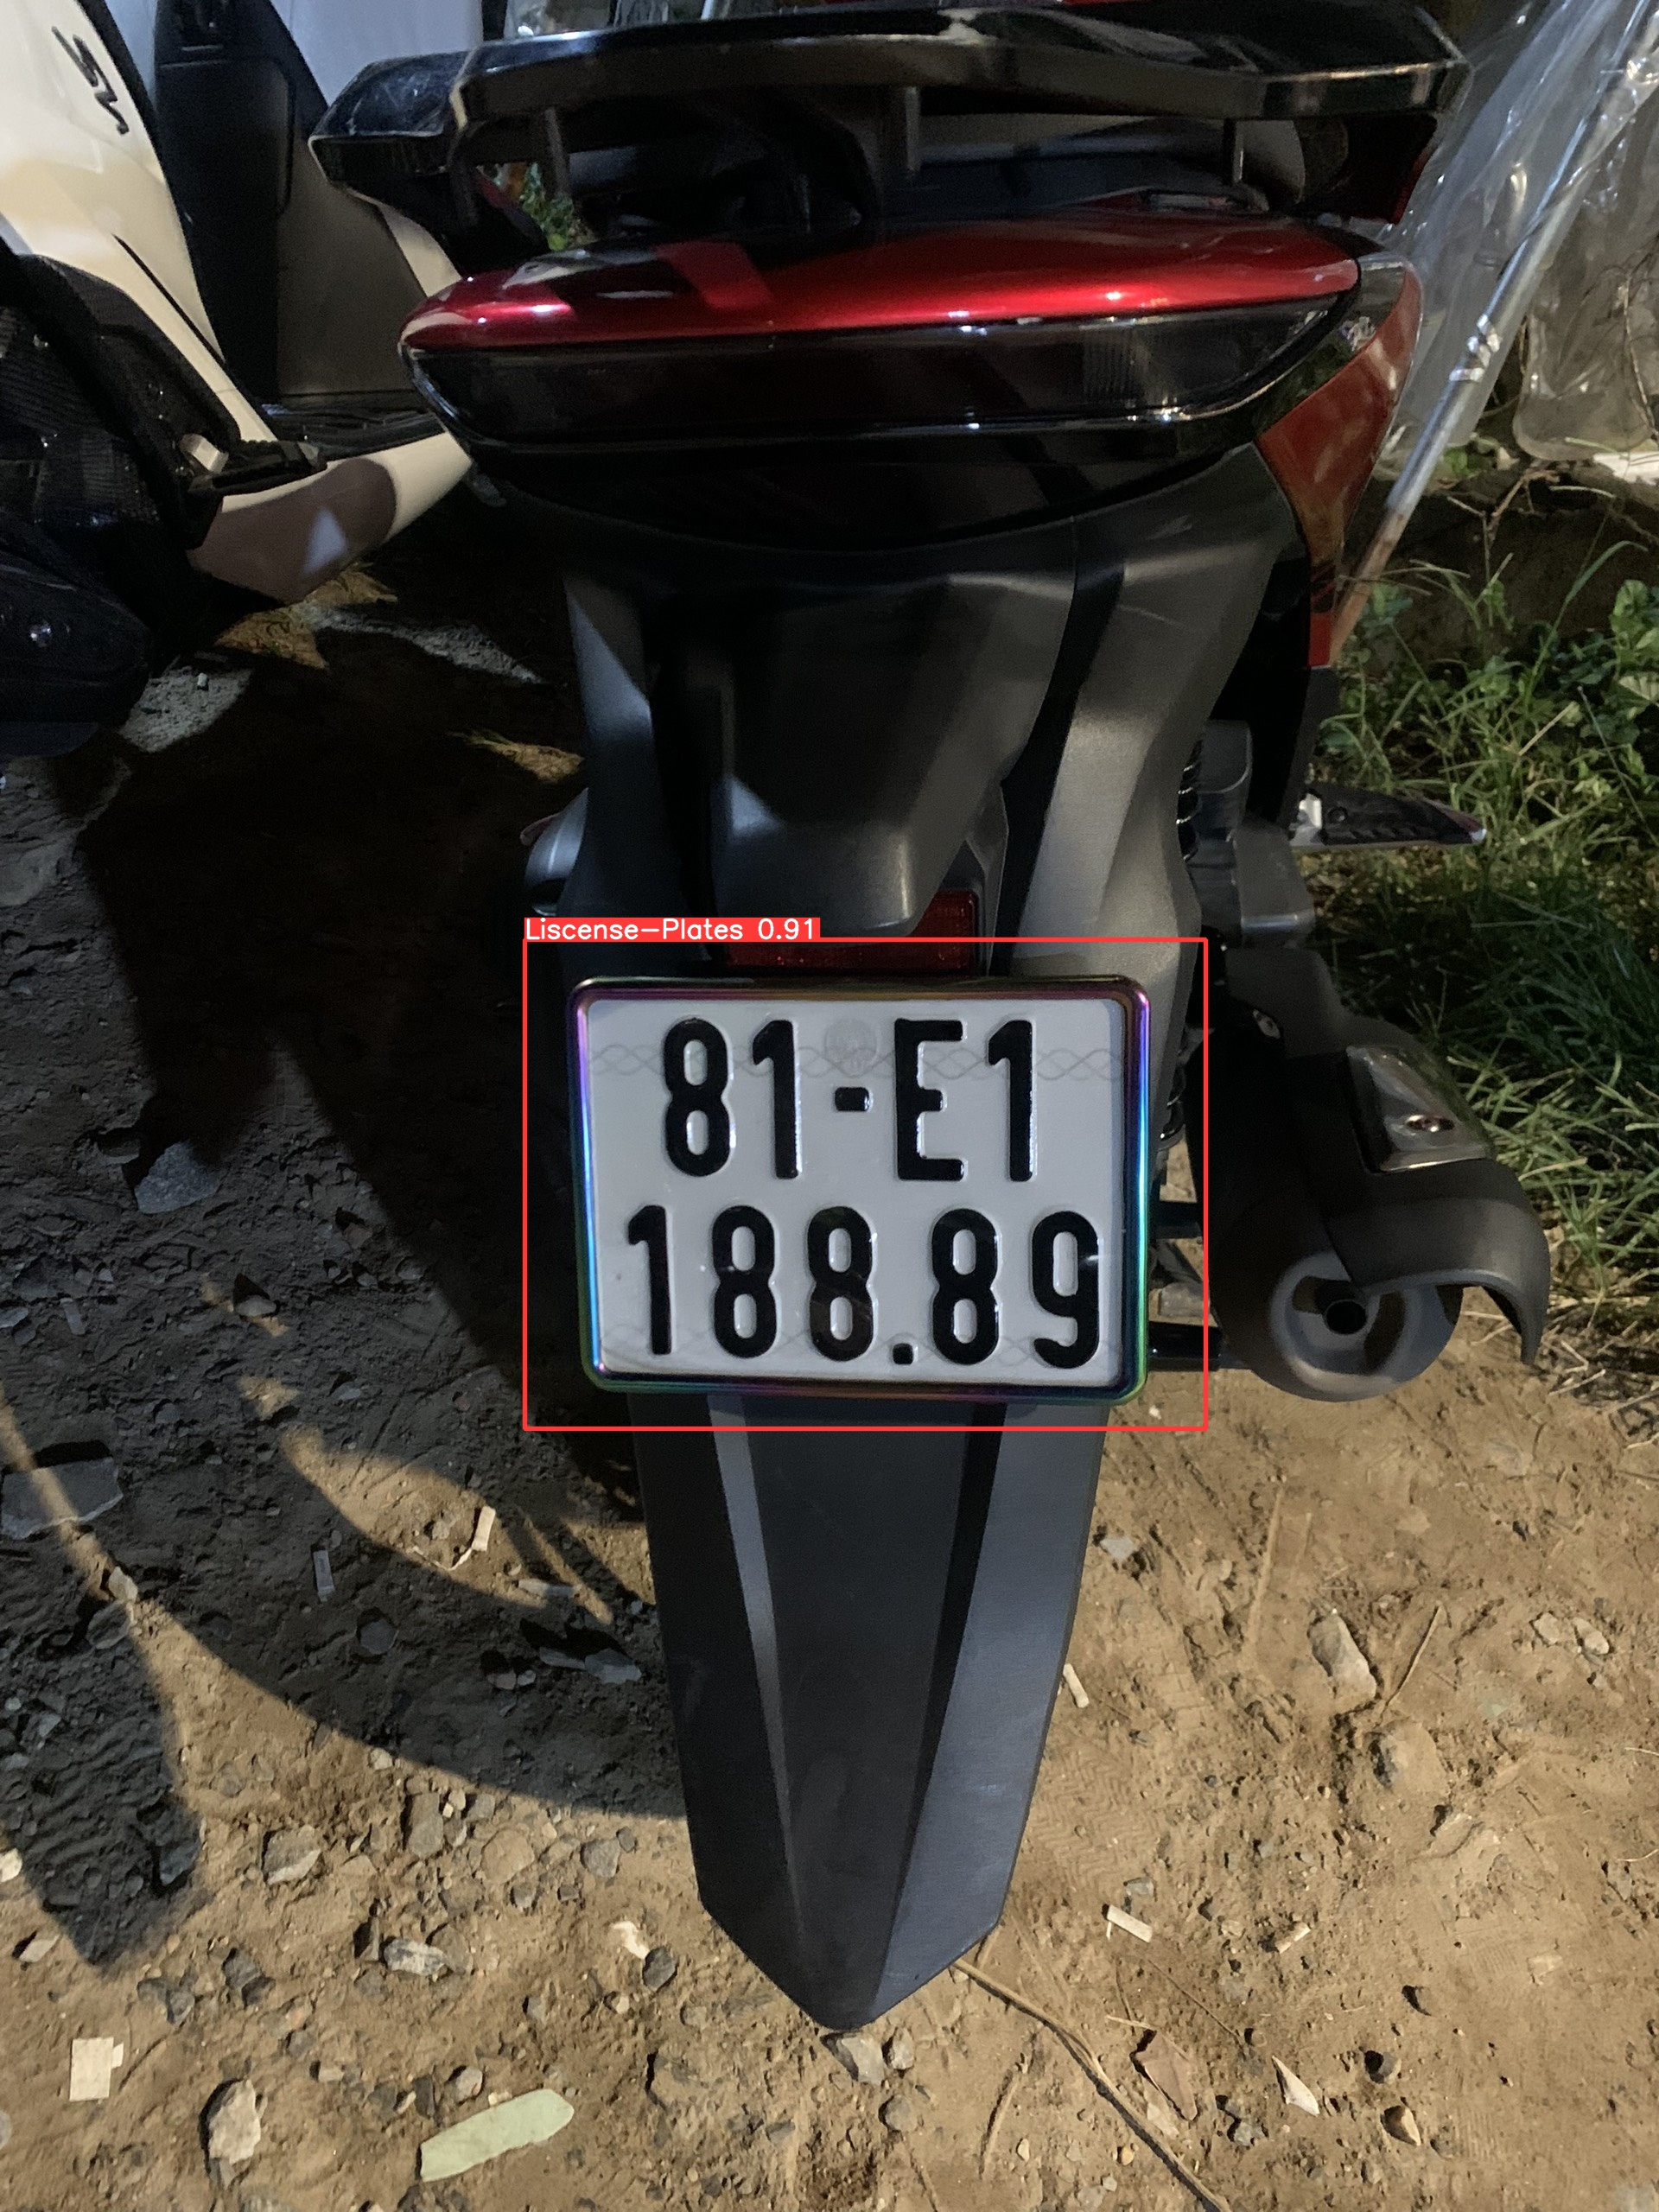

In [ ]:
display(Image('/content/yolov5/runs/detect/exp6/z4978030839008_0fe8b56f7b784c694ee43088b18be99d.jpg'))

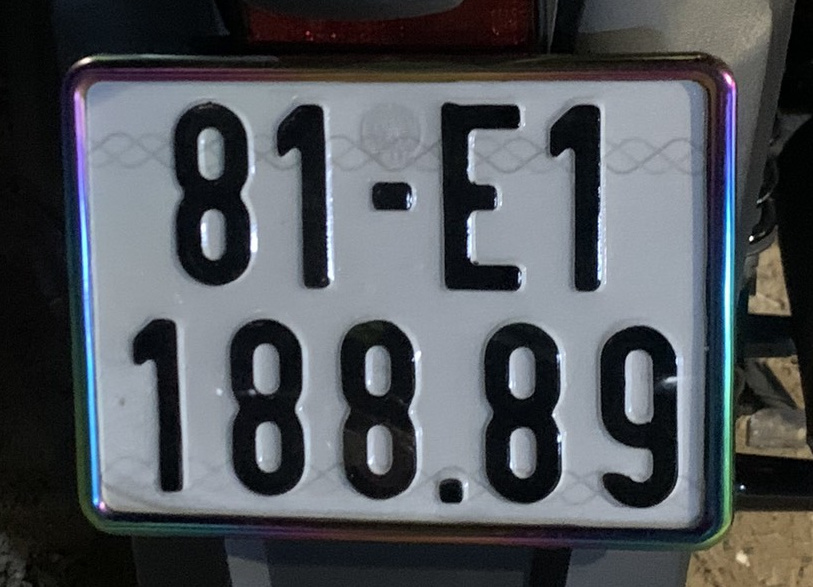

In [ ]:
display(Image('/content/yolov5/runs/detect/exp6/crops/Liscense-Plates/z4978030839008_0fe8b56f7b784c694ee43088b18be99d.jpg'))